#**My First Project of machine learning**

##*Linear Regression Model*

###**Load DataSet**

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")


###**Data Preparation**

**Data Separating into X and Y**

In [ ]:
y=df['logS']

In [ ]:
X=df.drop(columns='logS')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)


###**Data Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_lr_train=lr.predict(X_train)

In [ ]:
y_lr_test=lr.predict(X_test)

###Model performance


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr_train_mse=mean_squared_error(y_train,y_lr_train)
lr_train_r2=r2_score(y_train,y_lr_train)

lr_test_mse=mean_squared_error(y_test,y_lr_test)
lr_test_r2=r2_score(y_test,y_lr_test)

In [ ]:
lr_test_mse

0.9785998335638344

In [ ]:
lr_train_r2

0.7626677120764102

In [ ]:
lr_train_mse

1.0211498324104205

In [ ]:
lr_results=pd.DataFrame(['LinearRegression',lr_test_mse,lr_test_r2,lr_train_mse,lr_train_r2]).transpose()

In [ ]:
lr_results.columns=['method','MSE_test','R2_test','MSE_train','R2_train']

In [ ]:
lr_results

,method,MSE_test,R2_test,MSE_train,R2_train
0,LinearRegression,0.9786,0.789862,1.02115,0.762668


##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train=rf.predict(X_train)
y_rf_test=rf.predict(X_test)

In [ ]:
rf_train_mse=mean_squared_error(y_train,y_rf_train)
rf_train_r2=r2_score(y_train,y_rf_train)

rf_test_mse=mean_squared_error(y_test,y_rf_test)
rf_test_r2=r2_score(y_test,y_rf_test)

In [ ]:
rf_results=pd.DataFrame(['Random_Forest',rf_test_mse,rf_test_r2,rf_train_mse,rf_train_r2]).transpose()
rf_results.columns=['method','MSE_test','R2_test','MSE_train','R2_train']

In [ ]:
rf_results

,method,MSE_test,R2_test,MSE_train,R2_train
0,Random_Forest,1.308167,0.719092,1.004799,0.766468


##**Concatination of both Models**

In [ ]:
df_models=pd.concat([rf_results,lr_results],axis=0)

In [ ]:
df_models

,method,MSE_test,R2_test,MSE_train,R2_train
0,Random_Forest,1.308167,0.719092,1.004799,0.766468
0,LinearRegression,0.9786,0.789862,1.02115,0.762668


##**Plotting with Scatter**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Text(0.5, 0, 'Experimental LogS')

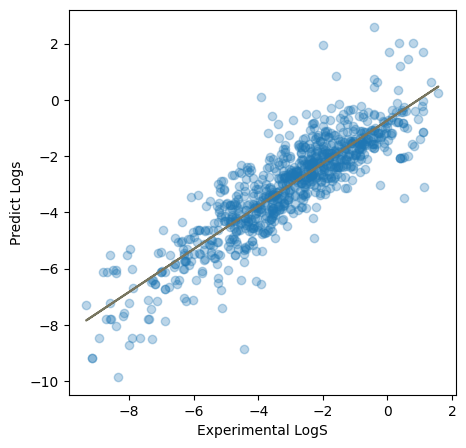

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train,alpha=0.3)
z = np.polyfit (y_train, y_lr_train, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#787660')
plt.ylabel("Predict Logs")
plt.xlabel("Experimental LogS")